** **

In [ ]:
!git clone https://www.github.com/microsoft/BatteryML # clone BatteryML github repository
!ls



Cloning into 'BatteryML'...
remote: Enumerating objects: 675, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 675 (delta 119), reused 94 (delta 43), pack-reused 477
Receiving objects: 100% (675/675), 1.33 MiB | 10.45 MiB/s, done.
Resolving deltas: 100% (432/432), done.
BatteryML  sample_data
[Errno 2] No such file or directory: 'BatteryML # change directory BatteryML root folder'
/content
BatteryML  sample_data


In [ ]:
%cd BatteryML
!ls

/content/BatteryML
baseline.ipynb	bin		    configs	    image    README.md	       SECURITY.md
batteryml	CODE_OF_CONDUCT.md  dataprepare.md  LICENSE  requirements.txt  setup.py


In [ ]:
!pip install -r requirements.txt # install the packages pandas, addict, fire, numpy>=1.24, tqdm, scipy, scikit-learn, pyyaml, numba, matplotlib, h5py, openpyxl
!pip install . # loads either the main.py file or the setup.py file within the current directory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=a55ffe8529eca6f9773b60c79029317180a942e100d51463494b06068c3664cd
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
Processing /content/BatteryML
  Preparing metadata (setup.py) ... done
  Created wheel for BatteryML: filename=BatteryML-0.0.1-py3-none-any.whl size=61830 sha256=9f499b57db15cc2052bbc937a017ec324d7c6440b39707f7269c1c515a429f9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-q0c2yt1q/wheels/24/2a/b1/e1def98dc5e0cb0314376fcf1f6af693cdc42bbe890a02dd50
Successfully built BatteryML


In [ ]:
!mkdir /content/BatteryML/data # makes a path in the structure specified
!mkdir /content/BatteryML/data/processed # makes the directory in the structure specified

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#!mkdir /content/BatteryML/data/processed/MATR
#!cp -r /content/drive/MyDrive/batteryml/datasets/processed/MATR/ /content/BatteryML/data/processed/
#
#!mkdir /content/BatteryML/data/processed/HUST
#!cp -r /content/drive/MyDrive/batteryml/datasets/processed/HUST /content/BatteryML/data/processed/
#
#!mkdir /content/BatteryML/data/processed/RWTH
#!cp -r /content/drive/MyDrive/batteryml/datasets/processed/RWTH /content/BatteryML/data/processed/
#
#!mkdir /content/BatteryML/data/processed/CALCE
#!cp -r /content/drive/MyDrive/batteryml/datasets/processed/CALCE /content/BatteryML/data/processed/
#

Mounted at /content/drive


In [ ]:
!mkdir /content/BatteryML/data/processed/MATR
!cp -r /content/drive/MyDrive/batteryml/datasets/processed/MATR /content/BatteryML/data/processed/
#!mkdir /content/BatteryML/data/processed/HUST
#!cp -r /content/drive/MyDrive/batteryml/datasets/processed/HUST /content/BatteryML/data/processed/
#!mkdir /content/BatteryML/data/processed/RWTH
#!cp -r /content/drive/MyDrive/batteryml/datasets/processed/RWTH /content/BatteryML/data/processed/

In [ ]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.
import sys
from batteryml.pipeline import Pipeline
from batteryml.visualization.plot_helper import plot_capacity_degradation, plot_cycle_attribute, plot_result

%load_ext autoreload
%autoreload 2

**Models: rf, variance_model, full_model, discharge_model, gpr, pcr, plsr, dummy, ridge, mlp, lstm, cnn. Datasets: clo, matr_1, matr_2,hust**
cruh,crush,mix,snl,

Enter the datasets separated by comma: hust
Enter the model names separated by comma: plsr
plsr
hust
Seed is set to 0.
Load datasets from cache cache/battery_cache_4304ee6018890bda9e083984960b43fc.pkl.
hust plsr
tensor([-0.7178, -1.4440, -1.0463,  0.1879,  1.1576,  1.7829, -0.5105,  1.7629,
        -1.3295, -0.3312,  0.9900, -1.7259,  0.2800,  1.3652,  0.0218, -0.2179,
        -0.4443,  0.1120, -0.1421,  1.3295, -1.5793, -0.8653])


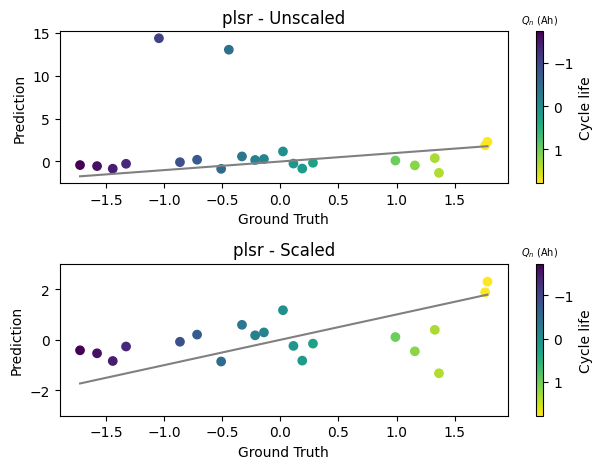

In [ ]:
import os
import pandas as pd

config_dir = 'configs/baselines/'
datasets = input("Enter the datasets separated by comma: ").split(',')
methods = input("Enter the model names separated by comma: ").split(',')
result = []

# Assuming method types are still required and listed in a directory
for method_type in os.listdir(config_dir):
    # Check if the method type directory contains any of the methods of interest
    for method in methods:
        # Check if the method directory exists before proceeding

        method_path = os.path.join(config_dir, method_type, method)
        if os.path.exists(method_path):
            print(method)
            for data in datasets:
                print(data)
                config_path = os.path.join(method_path, f'{data}.yaml')
                pipeline = Pipeline(config_path=config_path,
                                    workspace=f'workspaces/{method}')
                model, dataset = pipeline.train(device='cpu', skip_if_executed=False)
                train_prediction = model.predict(dataset, data_type='train')
                train_loss = dataset.evaluate(train_prediction, 'RMSE', data_type='train')
                test_prediction = model.predict(dataset, data_type='test')
                test_loss = dataset.evaluate(test_prediction, 'RMSE', data_type='test')
                # get raw data from pipeline
                train_cells, test_cells = pipeline.raw_data['train_cells'], pipeline.raw_data['test_cells']
                print(data, method)
                print(dataset.test_data.label)
            # normailze across all predictions first and assign to y_min, y_max
            #

            prediction = model.predict(dataset, data_type='test').to('cpu')
            ground_truth = dataset.test_data.label.to('cpu')
            plot_result(ground_truth, prediction,method)
            result.append([method, train_loss, test_loss])

res = pd.DataFrame(data=result, columns=['method', 'train_RMSE', 'test_RMSE'])


In [ ]:
import os
import pandas as pd

config_dir = 'configs/baselines/'
datasets = input("Enter the datasets separated by comma: ").split(',')
methods = input("Enter the model names separated by comma: ").split(',')
result = []

# Assuming method types are still required and listed in a directory
for method_type in os.listdir(config_dir):
    # Check if the method type directory contains any of the methods of interest
    for method in methods:
        # Check if the method directory exists before proceeding
        method_path = os.path.join(config_dir, method_type, method)
        if os.path.exists(method_path):
            print(method)
            for data in datasets:
                print(data)
                config_path = os.path.join(method_path, f'{data}.yaml')
                pipeline = Pipeline(config_path=config_path,
                                    workspace=f'workspaces/{method}')
                model, dataset = pipeline.train(device='cpu', skip_if_executed=False)
                train_prediction = model.predict(dataset, data_type='train')
                train_loss = dataset.evaluate(train_prediction, 'RMSE', data_type='train')
                test_prediction = model.predict(dataset, data_type='test')
                test_loss = dataset.evaluate(test_prediction, 'RMSE', data_type='test')
                # get raw data from pipeline
                train_cells, test_cells = pipeline.raw_data['train_cells'], pipeline.raw_data['test_cells']
                print(data, method)
                print(dataset.test_data.label)
                prediction = model.predict(dataset, data_type='test').to('cpu')
                ground_truth = dataset.test_data.label.to('cpu')
                plot_result(ground_truth, prediction)
                result.append([method, train_loss, test_loss])

res = pd.DataFrame(data=result, columns=['method', 'train_RMSE', 'test_RMSE'])


In [ ]:
!cp -r /content/BatteryML/workspaces /content/drive/MyDrive/batteryml/baseline/workspaces

In [ ]:
!cp -r /content/BatteryML/cache /content/drive/MyDrive/batteryml/baseline/cache